# Regresion Logistica

La Regresión Logística es un método estadístico para predecir clases binarias. El resultado o variable objetivo es de naturaleza dicotómica. Dicotómica significa que solo hay dos clases posibles. Por ejemplo, se puede utilizar para problemas de detección de cáncer o calcular la probabilidad de que ocurra un evento.

La Regresión Logística es uno de los algoritmos de Machine Learning más simples y más utilizados para la clasificación de dos clases. Es fácil de implementar y se puede usar como línea de base para cualquier problema de clasificación binaria. La Regresión Logística describe y estima la relación entre una variable binaria dependiente y las variables independientes.

A continuación se presentara la construcción de un modelo de regresión logítsica, paso por paso, para predecir la probabilidad de sobrevivir o morir por insuficiencia cadíaca.

https://www.kaggle.com/josemoncont/insuficienciacardiaca

VARIABLES
1. age: (edad) la edad de la persona con insuficiencia cardíaca
2. anaemia: (anemia) Disminución de los glóbulos rojos o de la hemoglobina (booleano)
3. creatinine_phosphokinase: (creatinina_fosfocinasa) Nivel de la enzima CPK en la sangre (mcg/L)
4. diabetes: Si el paciente tiene diabetes (booleano)
5. ejection_fraction: (fracción de expulsión) Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
6. high_blood_pressure: (presión alta - sangre) : Si el paciente tiene hipertensión (booleano)
7. platelets: (plaquetas) Nivel de plaquetas en la sangre (kiloplaquetas/mL)
8. serum_creatinine: (creatinina sérica) Nivel de creatinina sérica en la sangre (mg/dL)
9. serum_sodium: (sodio sérico) Nivel de sodio sérico en la sangre (mEq/L)
10. sex: (sexo) Mujer u Hombre (binario)
11. smoking: (fumar) Si el paciente fuma o no (booleano)
12. time: (tiempo) Período de seguimiento (días)
13. DEATH_EVENT: (evento de muerte) Si el paciente falleció durante el período de seguimiento (booleano)

### Importamos librerias

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

### Consumimos nuestra dataset

In [21]:
# Importamos nuestro archivo csv
datos = pd.read_csv('dataset.csv')

# Mostramos las 10 primera columnas
datos.head(n=10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Representación de los datos

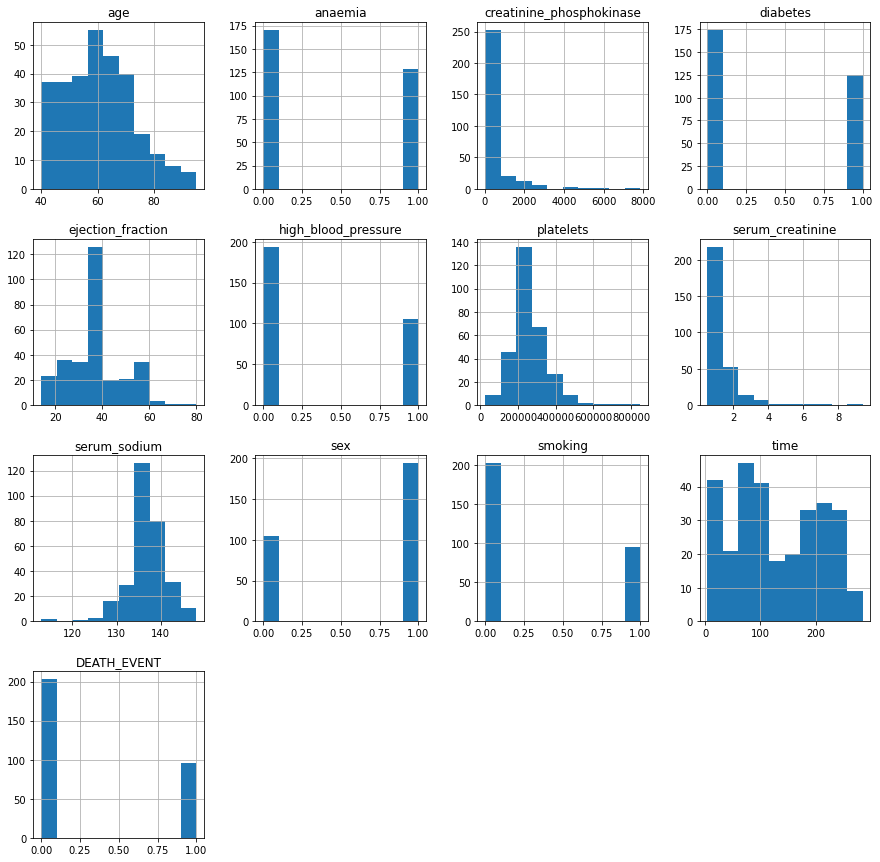

In [90]:
plt.rcParams['figure.figsize']=[15.,15.]
datos.drop([],1).hist()
plt.show()


C:\Users\manue\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


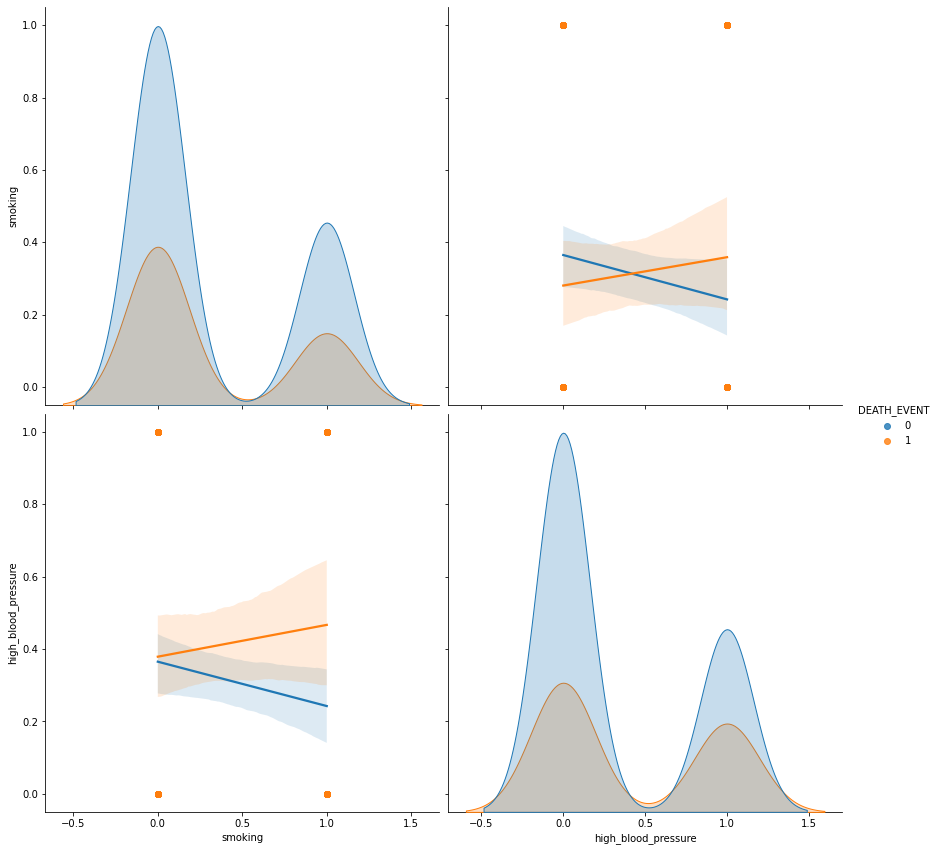

In [94]:
# Interralacionamos dos variables, para ver como se concentran linealmente a la salida de DEATH_EVENT
sns.pairplot(datos.dropna(),hue='DEATH_EVENT', size=6,vars=["smoking","high_blood_pressure"],kind="reg")
plt.show()

In [81]:
# Selecionamos las columnas 
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Con los datos seleccionados vemos la naturaleza de sus datos
z= datos[cols].describe()

e= datos.dtypes
print ('ESTADISTICA BASICA')
print (z)
print ('------------------------------------------------------------------------------------------------------------------')
print ('TIPO DE DATOS')
print (e)



ESTADISTICA BASICA
              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium        time  
count         299.00000    299.000000  299.000000  
mean            1.39388    136.625418  130.260870  
std             1.03451      4.412477   77.614208  
min             0.50000    113.000000    4.

In [22]:
# Seleccionamos las columnas 
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Calculamos la correlación por pares de columnas
datos[cols].corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


 ### Buscamos relación entre nuestras variables

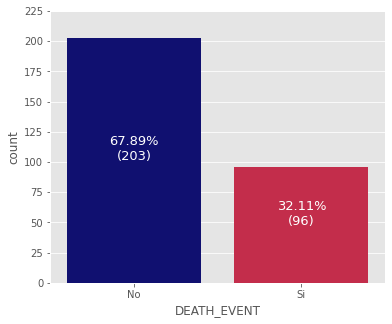

In [23]:
# Creamos un grafico de barras mostrando los que fallecieron y los que no
target_count = datos.DEATH_EVENT.value_counts()
death_color = ['navy', 'crimson']
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=datos, x='DEATH_EVENT', palette=death_color)
    for name , val in zip(target_count.index, target_count.values):
        plt.text(name, val/2, f'{round(val/sum(target_count)*100, 2)}%\n({val})', ha='center',
                color='white', fontdict={'fontsize':13})
    plt.xticks(ticks=target_count.index, labels=['No', 'Si'])
    plt.yticks(np.arange(0, 230, 25))
    plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

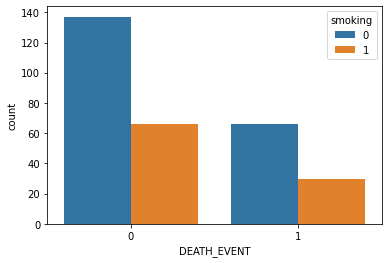

In [24]:
# Relacion entre la variable objetiva con SMOKING
sns.countplot(data=datos, x='DEATH_EVENT', hue = 'smoking')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

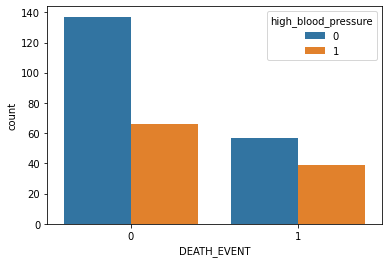

In [25]:
# Relacion entre la variable objetiva con HIPERTENSIÓN
sns.countplot(data=datos, x='DEATH_EVENT', hue = 'high_blood_pressure')

In [26]:
# Promedio de fallecidos por edades
datos.groupby(['DEATH_EVENT'])['age'].mean()

DEATH_EVENT
0    58.761906
1    65.215281
Name: age, dtype: float64

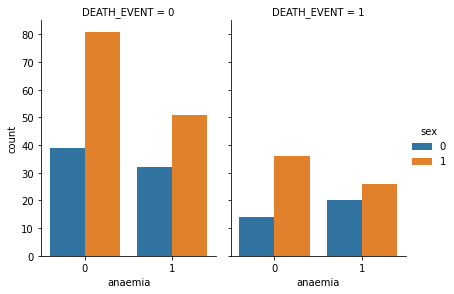

In [27]:
# Analizamos la relacion entre los FALLECIDOS y ANEMIA por SEXO
sns.catplot(x = 'anaemia', hue = 'sex', col = 'DEATH_EVENT', data = datos, kind = 'count', height= 4, aspect= 0.7 )

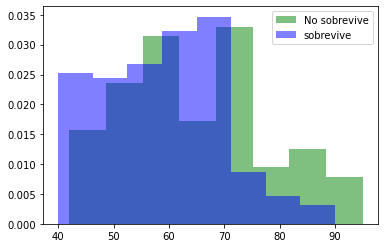

In [28]:
# Almacenamos los datos de Fallecidos en un array
x1 = datos.age[datos.DEATH_EVENT == 1]

# Almacenamos los datos de Sobrevivientes en un array
x2 = datos [datos.DEATH_EVENT == 0] ['age']

# Diseño del gráfico
kwargs = dict(alpha=0.5, bins=8, density=True)

# Mostramos los datos filtrados
plt.hist(x1, color='g', label='No sobrevive', **kwargs)
plt.hist(x2, color='b', label='sobrevive', **kwargs)
plt.legend()

Splot data in train and test

In [29]:
# Creamos 2 arrays que serviran de entrada para nuestra R. Logística
X= datos.drop(columns='DEATH_EVENT')
y= datos.DEATH_EVENT

# Dimensión de nuetra matriz
X.shape

(299, 12)

In [45]:
# Variables que representaran el 20% de dato a usar para el modelo, el resto será de entrenamiento 
validacion = 0.20
valor = 0

# Separamos la data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validacion, random_state= valor)

Probando el modelo

In [46]:
# Generamos nuestro modelo de Regresion Logistica
modelo = linear_model.LogisticRegression(solver= 'lbfgs', max_iter= 1000)

# Le asignamos los valores de entrada, para ajustar nuestro modelo
modelo.fit(X_train,y_train)

# Predecimos los resultados
prediccion = modelo.predict(X_test)

accuracyTrain = modelo.score(X_train, y_train)
accuracyTest= modelo.score(X_test, y_test)

print ('Precision en conjunto de entrenamiento:', accuracyTrain)
print ('Precision en conjunto de prueba:', accuracyTest)

Precision en conjunto de entrenamiento: 0.8577405857740585
Precision en conjunto de prueba: 0.7333333333333333


In [82]:
# Generamos nuestros pliegues de validación
kfold = model_selection.KFold(n_splits=5, random_state= valor, shuffle=True)

#Validamos nuestro modelo dividiendo en partes, y pasandole la metrica de validación
cv_resultados = model_selection.cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')

print ('precision en validacion cruzada:', cv_resultados)

precision en validacion cruzada: [0.75       0.91666667 0.89583333 0.79166667 0.80851064]


Area debajo de la curva de ROC: 0.826087


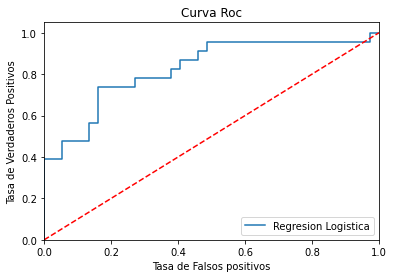

0.2779050065133957


In [55]:
# Generamos nuestra curva ROC
fpr , tpr , threholds = roc_curve(y_test, modelo.predict_proba(X_test)[:,1])

# Establecemos nuestro valor AUC
roc_auc = auc(fpr, tpr)
print ("Area debajo de la curva de ROC: %f" % roc_auc)

# Creamos nuestra figura 
plt.figure()
plt.plot(fpr, tpr, label='Regresion Logistica')
plt.plot([0, 1], [0, 1], 'r--')

# Establecemos los limites
plt.xlim({0.0, 1.0})
plt.ylim([0.0, 1.05])

# Asignamos nuestros titulos
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Roc')

# Definimos la ubicación de la leyenda
plt.legend(loc= 'lower right')

#mostramos nuestra figura
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threholds[optimal_idx]
print (optimal_threshold)

In [56]:
# Generamos nuestra matriz de confusion
print (confusion_matrix(y_test, prediccion))

[[35  2]
 [14  9]]


In [57]:
# Generamos las metricas, mediante un reporte
print (classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81        37
           1       0.82      0.39      0.53        23

    accuracy                           0.73        60
   macro avg       0.77      0.67      0.67        60
weighted avg       0.75      0.73      0.70        60

